## Importing Necessary Libraries

In [220]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Working on Dataset 1

In [209]:
df1=pd.read_csv('EV_India.csv')

In [210]:
df1.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


In [211]:
#Looking for null values
df1.isna().sum()

Sr. No.                       0
State Name                    0
Total Electric Vehicle        4
Total Non-Electric Vehicle    4
Total                         4
dtype: int64

In [212]:
#Dropping null values
df1.dropna(inplace=True)

In [213]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sr. No.                     32 non-null     int64 
 1   State Name                  32 non-null     object
 2   Total Electric Vehicle      32 non-null     object
 3   Total Non-Electric Vehicle  32 non-null     object
 4   Total                       32 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [214]:
#Changing the Data Type of 'Total Electric Vehicle' from object to numeric
for i in df1['Total Electric Vehicle']:
    df1['Total Electric Vehicle'].replace(i,i.replace(',',''),inplace=True)
df1['Total Electric Vehicle']=df1['Total Electric Vehicle'].astype('float')

In [215]:
#Making a new dataset for Electric Vehicles Only in arranged manner
df1_Electric=df1[['State Name','Total Electric Vehicle']].sort_values(by='Total Electric Vehicle',ascending=False).head(5)

Text(0.5, 1.0, 'Percentage of Top 5 stated having Electric Vehicles')

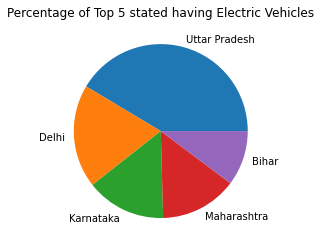

In [216]:
labels=df1_Electric['State Name'].head(5)
plt.pie(data=df1_Electric,x='Total Electric Vehicle',labels=labels)
plt.title('Percentage of Top 5 stated having Electric Vehicles')

Observation:
Clearly, Uttar Pradesh has the largest number of electric vehicles followed by Delhi, Maharashtra and Karnataka.

In [217]:
#Changing the Data Type of 'Total Non-Electric Vehicle' from object to numeric
for i in df1['Total Non-Electric Vehicle']:
    df1['Total Non-Electric Vehicle'].replace(i,i.replace(',',''),inplace=True)
df1['Total Non-Electric Vehicle']=df1['Total Non-Electric Vehicle'].astype('float')

Text(0.5, 1.0, 'Percentage of Top 5 stated having Non-Electric Vehicles')

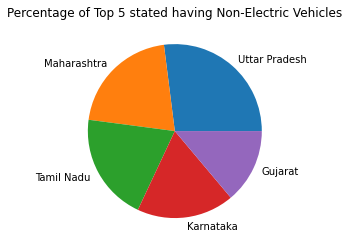

In [218]:
df1_non_electric=df1[['State Name','Total Non-Electric Vehicle']].sort_values(by='Total Non-Electric Vehicle',ascending=False).head(5)
labels=df1_non_electric['State Name'].head(5)
plt.pie(data=df1_non_electric,x='Total Non-Electric Vehicle',labels=labels)
plt.title('Percentage of Top 5 stated having Non-Electric Vehicles')

Observation: Uttar Pradesh has the highest number of non- electric vehicles too.


## Working on Dataset 2

In [221]:
df3=pd.read_csv('EVStats3.csv')

In [222]:
df3.head()

,name,state,city,address,lattitude,longitude,type,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0,NaN,NaN,NaN,NaN,NaN
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0,NaN,NaN,NaN,NaN,NaN
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0,NaN,NaN,NaN,NaN,NaN
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0,NaN,NaN,NaN,NaN,NaN
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0,NaN,NaN,NaN,NaN,NaN


In [223]:
#Dropping Unnecessary columns
df3=df3.iloc[:,0:7]

In [224]:
#Looking for Null Values
df3.isna().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [225]:
#Dropping address and type columns as it is of no use
df3.drop('address',axis=1,inplace=True)
df3.drop('type',axis=1,inplace=True)

In [226]:
df3.isna().sum()

name         0
state        0
city         0
lattitude    6
longitude    6
dtype: int64

In [227]:
#Dropping null values
df3.dropna(inplace=True)

In [228]:
#Looking for duplicated Values
df3.duplicated().sum()

235

In [229]:
#Dropping Duplicated Values
df3.drop_duplicates(inplace=True)

In [231]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1546
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1306 non-null   object 
 1   state      1306 non-null   object 
 2   city       1306 non-null   object 
 3   lattitude  1306 non-null   object 
 4   longitude  1306 non-null   float64
dtypes: float64(1), object(4)
memory usage: 61.2+ KB


In [232]:
#Changing the data type of lattitude column
for i in df3['lattitude']:
    df3['lattitude'].replace(i,i.replace("'",''),inplace=True)
    df3['lattitude'].replace(i,i.replace(",",''),inplace=True)
df3['lattitude']=df3['lattitude'].astype('float')

## Plotting all the charging Stations Of Electric Vehicles on the Map

In [233]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [234]:
#getting the coordinates of the first Entry of EV Charging station and Initializing the map
cor=list(df3[['lattitude','longitude']].iloc[0,0:2])
site_map = folium.Map(location=cor, zoom_start=4)

In [285]:
#Plotting all the EV Charging Stations
coordinates_df=df3[['lattitude','longitude']]
for i in range(0,1306):
    cor=list(coordinates_df.iloc[i,0:2])
    circle = folium.Circle(cor, radius=10, color='#d35400', fill=True)
    site_map.add_child(circle)
site_map

Observation: Urban cities like Delhi, Bangalore and Mumbai have more EV charging stations.

## Working On Dataset 3 

In [236]:
df4=pd.read_csv('EVStats.csv')
df4.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


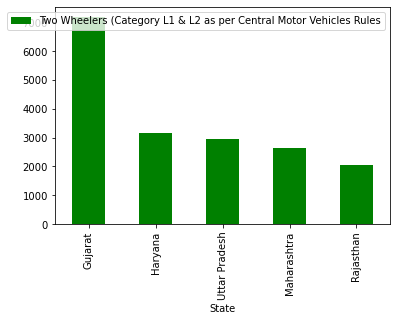

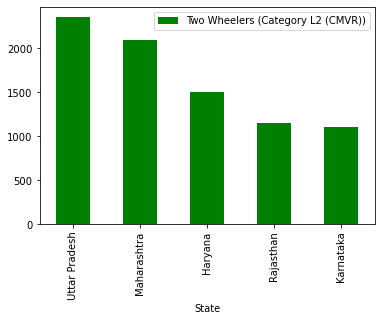

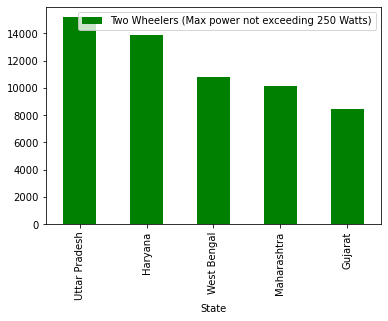

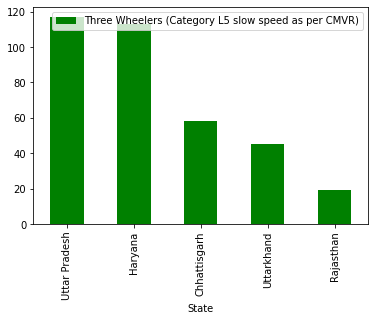

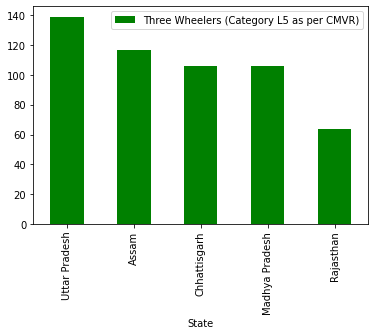

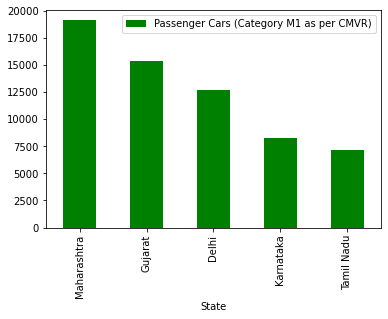

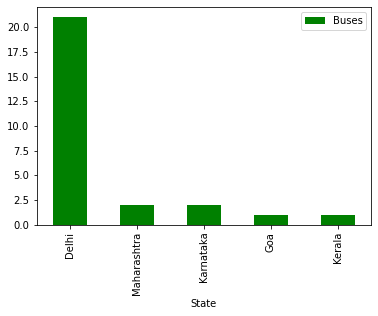

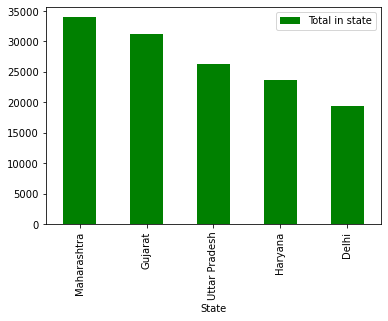

In [288]:
# Top 5 states for each category of Electric Vehicles
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  graph = df4.sort_values(y, ascending=False).head(5).plot.bar(x='State', y=y,color='Green')

Observations regarding Electric Vehicles of Different types in various states:
    
    1.Two wheelers of Category L1 and L2 are sold most in Gujarat.
    2.Two wheelers of Category L2(CMVR) are sold most in Uttar Pradesh.
    3.Three wheelers of Category L5(CMVR) are sold most in Uttar Pradesh.
    4.Passenger Cars are sold most in Maharashtra.
    5.Buses are sold most in Delhi.
    6.Overall, Maharashtra is the Largest user of Electric Vehicles.
Based on the type of electric vehicle, states with higher number of electric vehicle can be targeted as people in these states are more likely to purchase them.

## Working On Dataset 4

In [237]:
df=pd.read_csv('EVStats2.csv')

In [238]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [239]:
df.duplicated().sum()

0

In [240]:
df.shape

(99, 13)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [242]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [243]:
# Observing unique value for object dtype columns
for col in ['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working','Make']:
  print(col,':',df[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [244]:
df['Age'].describe()

count    99.000000
mean     36.313131
std       6.246054
min      26.000000
25%      31.000000
50%      36.000000
75%      41.000000
max      51.000000
Name: Age, dtype: float64

In [245]:
#Performing Binning on Age column
bins = [25,30,35,40,45,52]
df['Age'] = pd.cut(df['Age'], bins) # cut()--> for only binning purposes
df['Age'] = df.Age.astype(str)

## Cleaning Data

The entry 'm' for wife working is strange.

In [246]:
df[df['Wife Working']=='m']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,"(30, 35]",Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


There is only one such entry and the wife's salary is 0. It is safe to say that the wife is unemployed.

In [247]:
df=df.replace(to_replace ="m", value ="No")
df.loc[11]

Age                 (30, 35]
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

<AxesSubplot:>

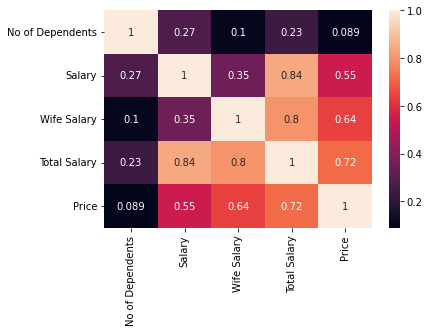

In [248]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)   

In [ ]:
No two

Behavioural and Physiographic Analysis

1. Relation between consumers' age and the make of vehicles they tend to purchase


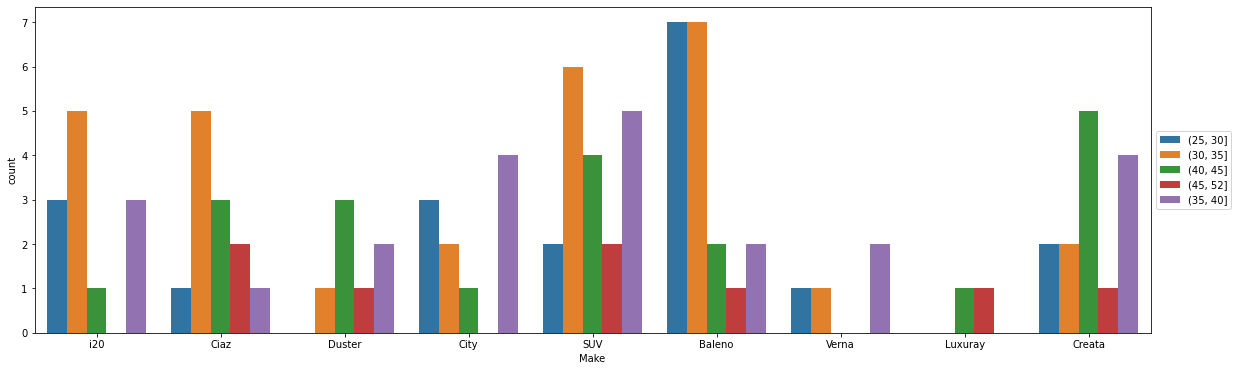

In [253]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Observations:
    
1.Most People in the age group of 25-30 and 30-35 prefer Baleno.

2.Largest number of People buy their cars in the age of 30-45


2. Relation between consumers' age and the price of vehicles they tend to purchase

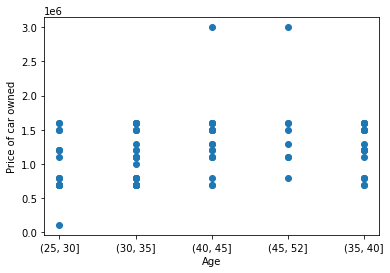

In [254]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(df['Age'],df['Price'])

2. Relation between consumers' total salary and the vehicles they tend to purchase

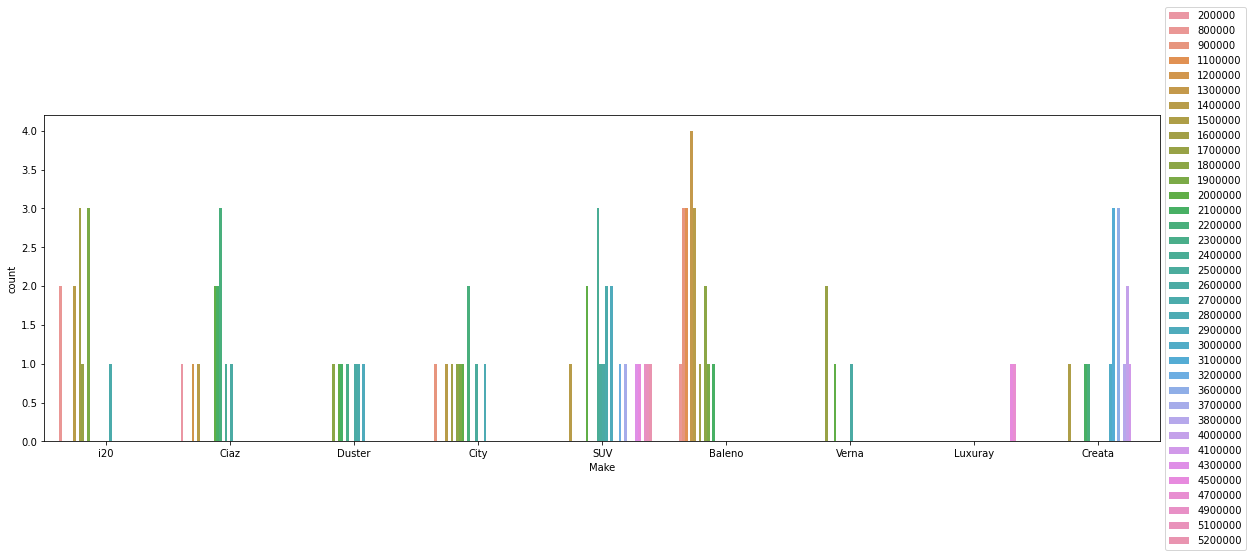

In [255]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Clearly, The people Who have Large amount of salaries buy SUV and Luxury cars.

3. Relation between number of dependents on a consumer and the vehicles they tend to purchase

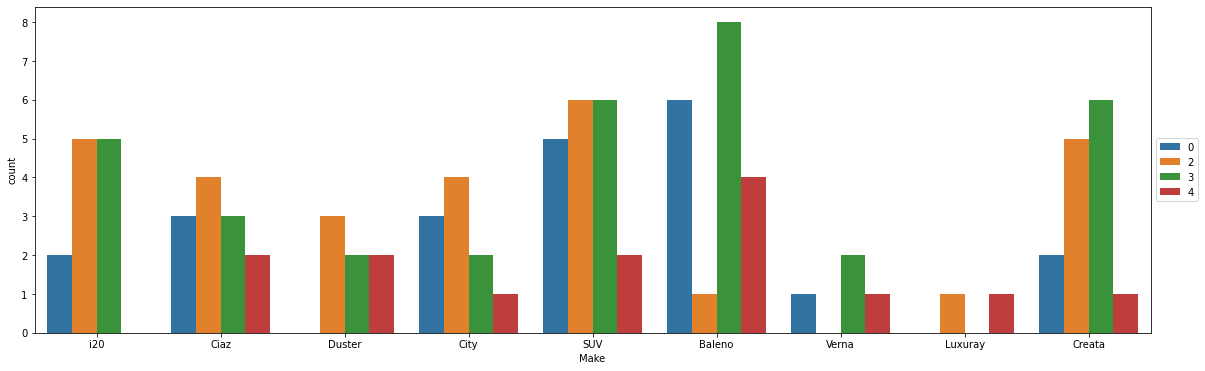

In [257]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="No of Dependents")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

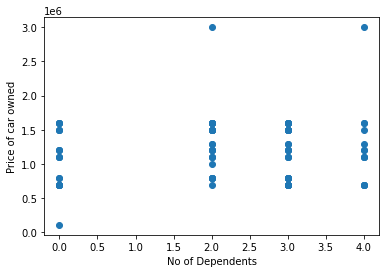

In [258]:
plt.xlabel('No of Dependents')
plt.ylabel('Price of car owned')
plt.scatter(df['No of Dependents'],df['Price'])

4. Relation between consumers' marital status and the vehicles they tend to purchase

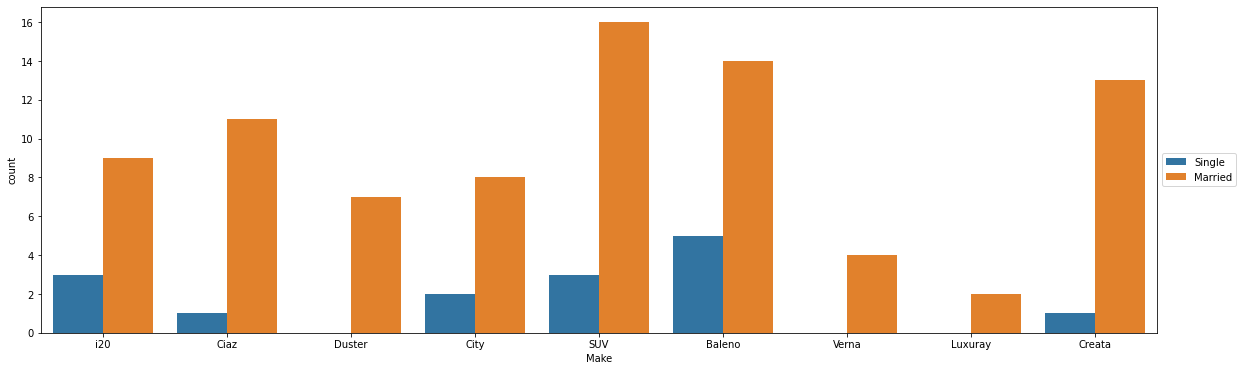

In [259]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Marrital Status")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Married people purchase more cars than single people.

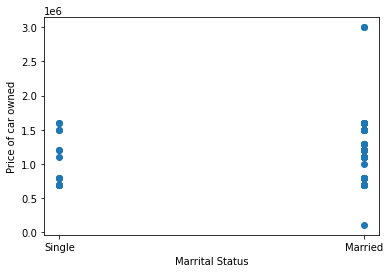

In [260]:
plt.xlabel('Marrital Status')
plt.ylabel('Price of car owned')
plt.scatter(df['Marrital Status'],df['Price'])

5. Relation between consumers profession and the vehicles they tend to purchase

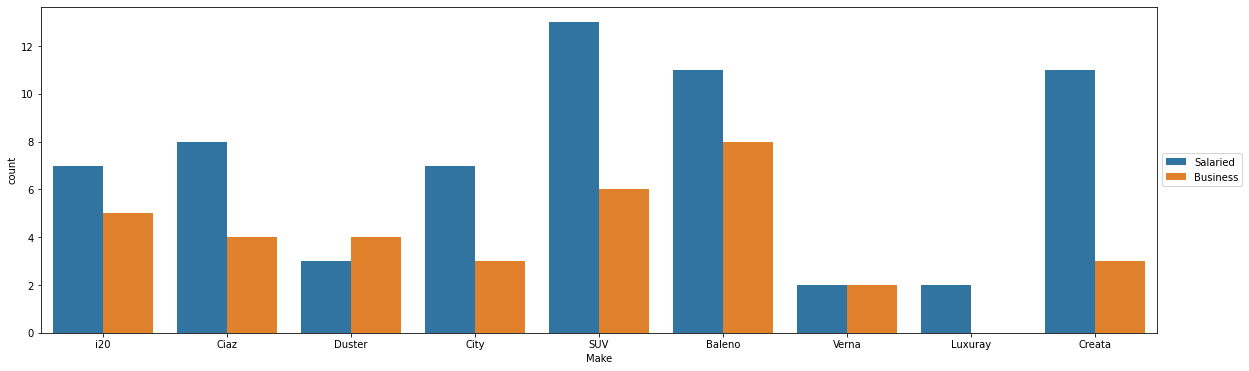

In [261]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Profession")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

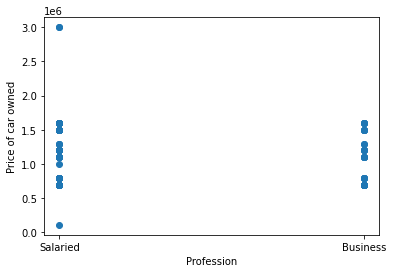

In [262]:
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(df['Profession'],df['Price'])

6. Relation between consumers education and the vehicles they tend to purchase

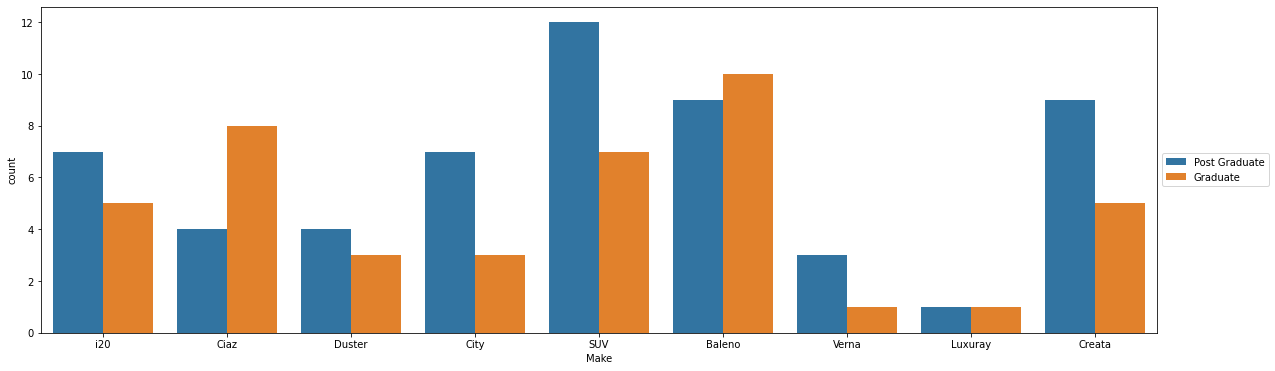

In [263]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

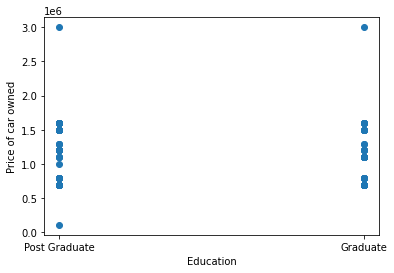

In [264]:
plt.xlabel('Education')
plt.ylabel('Price of car owned')
plt.scatter(df['Education'],df['Price'])

7. Relation between consumers loan status (indicator of purchasing power) and the vehicles they tend to purchas

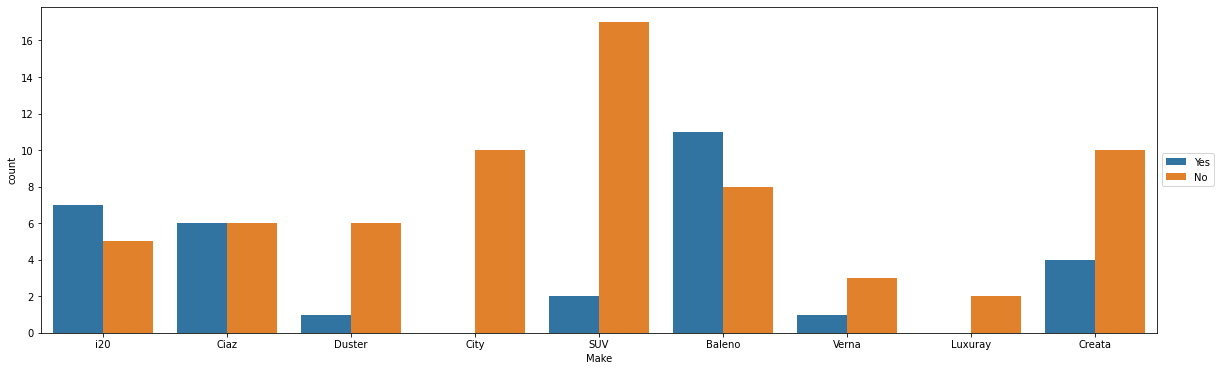

In [265]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Personal loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Clearly, People who do not have Personal loans have money to buy SUV and Luxury cars.

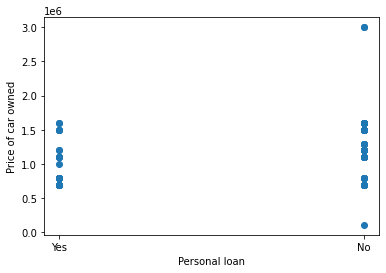

In [266]:
plt.xlabel('Personal loan')
plt.ylabel('Price of car owned')
plt.scatter(df['Personal loan'],df['Price'])

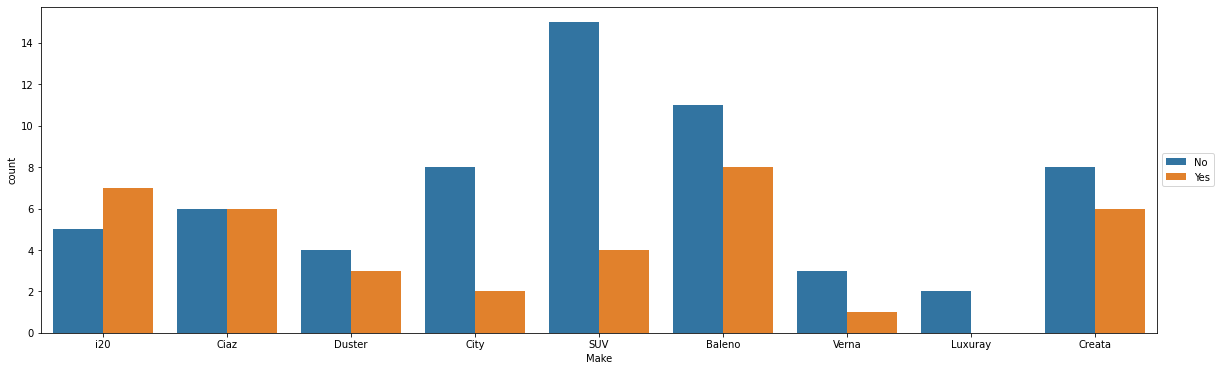

In [267]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="House Loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

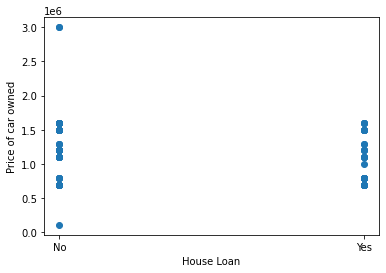

In [268]:
plt.xlabel('House Loan')
plt.ylabel('Price of car owned')
plt.scatter(df['House Loan'],df['Price'])

In [269]:
#Getting Independent columns
X = df.iloc[:,df.columns!='Make']
X.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,"(25, 30]",Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,"(30, 35]",Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,"(40, 45]",Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,"(40, 45]",Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,"(30, 35]",Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [270]:
encoding = {"Age":{'(25-30]':0,'(30, 35]':1,'(35, 40]':2,'(40, 45]':3,'(25, 30]':4,'(45, 52]':5},
            "Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }

In [271]:
obj_df = X.replace(encoding)
obj_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,4,0,0,1,0,1,0,0,800000,0,800000,800000
1,1,0,1,1,2,1,1,1,1400000,600000,2000000,1000000
2,3,1,1,0,4,1,1,0,1800000,0,1800000,1200000
3,3,1,1,1,3,0,0,1,1600000,600000,2200000,1200000
4,1,0,1,1,2,1,0,1,1800000,800000,2600000,1600000


## K means Clustering

In [272]:
# Importing Important Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [273]:

X_scaled = StandardScaler().fit_transform(obj_df)
X_scaled = pd.DataFrame(X_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = X_scaled.to_numpy()
X_scaled
     

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,1.122245,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-1.176423,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,0.356023,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.356023,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-1.176423,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.122245,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,1.888468,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,1.888468,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,1.888468,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [274]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


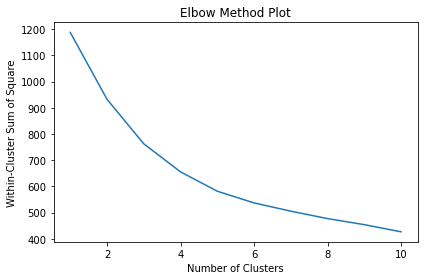

In [275]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

## k=3

In [276]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(X_scaled)  

KMeans(n_clusters=3, random_state=42)

In [277]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [278]:
final_data = pd.concat([df,y_df],axis=1) 
final_data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,"(25, 30]",Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2
1,"(30, 35]",Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,1
2,"(40, 45]",Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,1
3,"(40, 45]",Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,0
4,"(30, 35]",Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,"(25, 30]",Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,2
95,"(45, 52]",Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,0
96,"(45, 52]",Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,1
97,"(45, 52]",Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,0


In [280]:
from sklearn.metrics import silhouette_score
s=silhouette_score(X_scaled, y)
s

0.21740491681042928

## k=5

In [281]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [282]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [283]:
final_data = pd.concat([df,y_df],axis=1) 
final_data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Class
0,"(25, 30]",Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,"(30, 35]",Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,"(40, 45]",Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,"(40, 45]",Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,"(30, 35]",Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,"(25, 30]",Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,"(45, 52]",Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,4
96,"(45, 52]",Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,2
97,"(45, 52]",Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,4


In [284]:
s=silhouette_score(X_scaled, y)
s

0.22021733412439154